# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Raihan Fitriyansyah]
- **Email:** [mraihanf41@gmail.com]
- **ID Dicoding:** [hanmrf]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: 
Bagaimana perbandingan penyewaan sepeda antara casual dan registered?
- Pertanyaan 2
Bagaimana pola penyewaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [71]:
# memuat tabel day
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [72]:
# memuat tabel hour
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv berisi informasi harian mengenai penyewaan sepeda, kondisi musim dan cuaca, dan data pengguna.
- hour.csv memberikan informasi yang sama tapi diambil dengan data perjam.

### Assessing Data

In [73]:
# menilai data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [74]:
# cek duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [75]:
# menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
# cek duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak ditemukan data yang hilang pada kedua dataset.
- tidak ditemukan duplikasi pada kedua dataset.

### Cleaning Data

In [77]:
# mengubah tipe data dari object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- format dteday dikonversi untuk mempermudah analisi berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [78]:
# explorasi data day
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [79]:
# mengelompokkan data pengguna casual dan registered
user_type_df = day_df[['dteday', 'casual', 'registered']]

# melakukan agregasi untuk menghitung statistik deskriptif
user_agg = user_type_df.agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"]
}).reset_index()

# menampilkan hasil statistik deskriptif
print(user_agg)

  index         casual    registered
0   sum  620017.000000  2.672662e+06
1   max    3410.000000  6.946000e+03
2   min       2.000000  2.000000e+01
3  mean     848.176471  3.656172e+03
4   std     686.622488  1.560256e+03


In [80]:
# eksplorasi data hour
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [81]:
# mengelompokkan data berdasarkan jam dan menghitung rata-rata penyewaan untuk total (cnt)
hour_grouped = hour_df.groupby('hr').agg({
    'cnt': 'mean'
}).reset_index()

# periksa hasil
hour_grouped.head()

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


In [82]:
# menambahkan prefix pada kolom-kolom dari day_df untuk menghindari konflik nama kolom
day_df_prefixed = day_df.add_prefix('day_')

# menyimpan kolom 'dteday' tanpa prefix untuk penggabungan
day_df_prefixed['dteday'] = day_df['dteday']

# menggabungkan data berdasarkan kolom 'dteday'
all_df = pd.merge(
    left=hour_df,                
    right=day_df_prefixed,       
    how='left',                  
    on='dteday'                  
)

# menampilkan hasil penggabungan
all_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,day_weekday,day_workingday,day_weathersit,day_temp,day_atemp,day_hum,day_windspeed,day_casual,day_registered,day_cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**
- Pengguna registered lebih banyak jika dibandingkan pengguna casual.
- Terdapat peningkatan penyewaan sepeda di pagi hari (sekitar jam 7–9) dan satu lagi di sore hari (sekitar jam 17–19).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

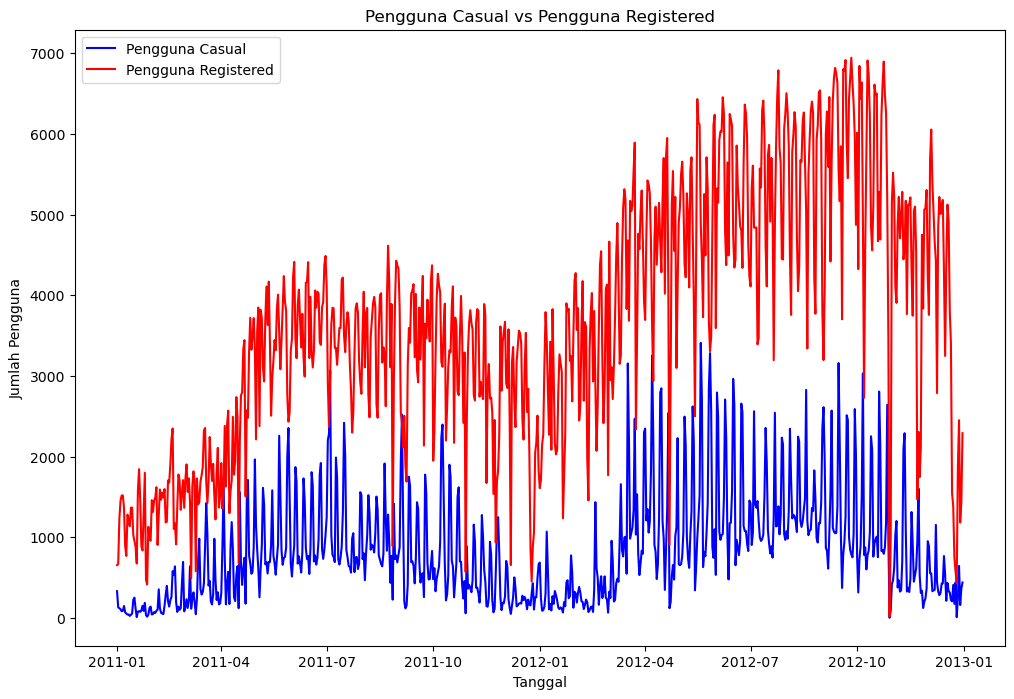

In [83]:
# visualisasi untuk pertanyaan 1
plt.figure(figsize=(12, 8))
plt.plot(day_df['dteday'], day_df['casual'], label='Pengguna Casual', color='blue')
plt.plot(day_df['dteday'], day_df['registered'], label='Pengguna Registered', color='red')
plt.title('Pengguna Casual vs Pengguna Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.show()

### Pertanyaan 2:

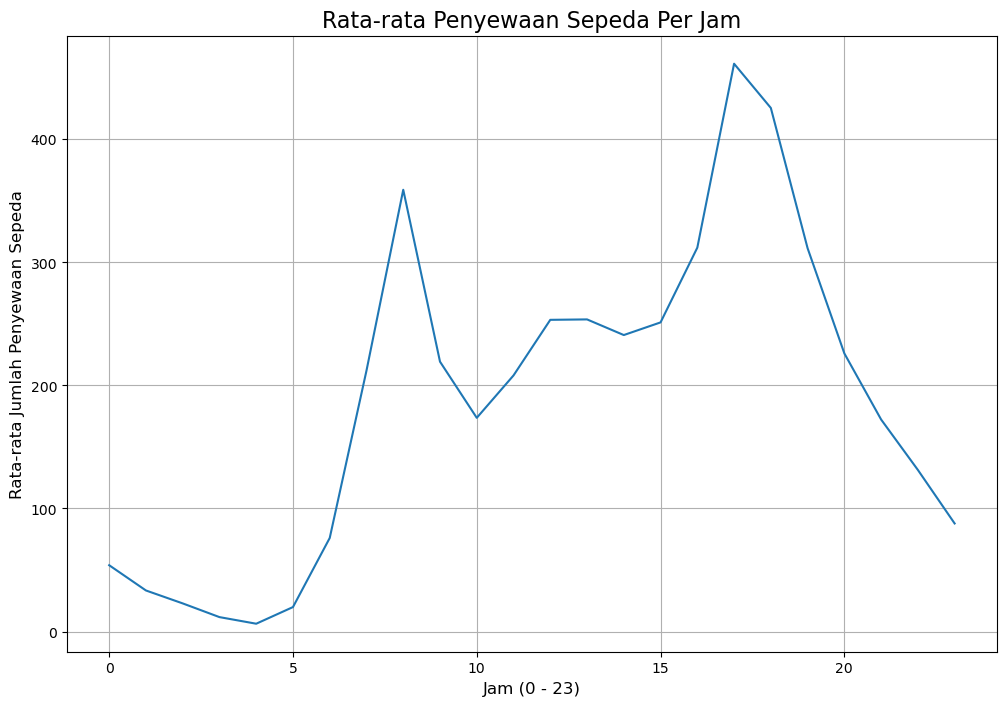

In [84]:
# visualisasi untuk pertanyaan 2
plt.figure(figsize=(12, 8))
sns.lineplot(x='hr', y='cnt', data=hour_grouped)
plt.title('Rata-rata Penyewaan Sepeda Per Jam', fontsize=16)
plt.xlabel('Jam (0 - 23)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.grid(True)
plt.show()

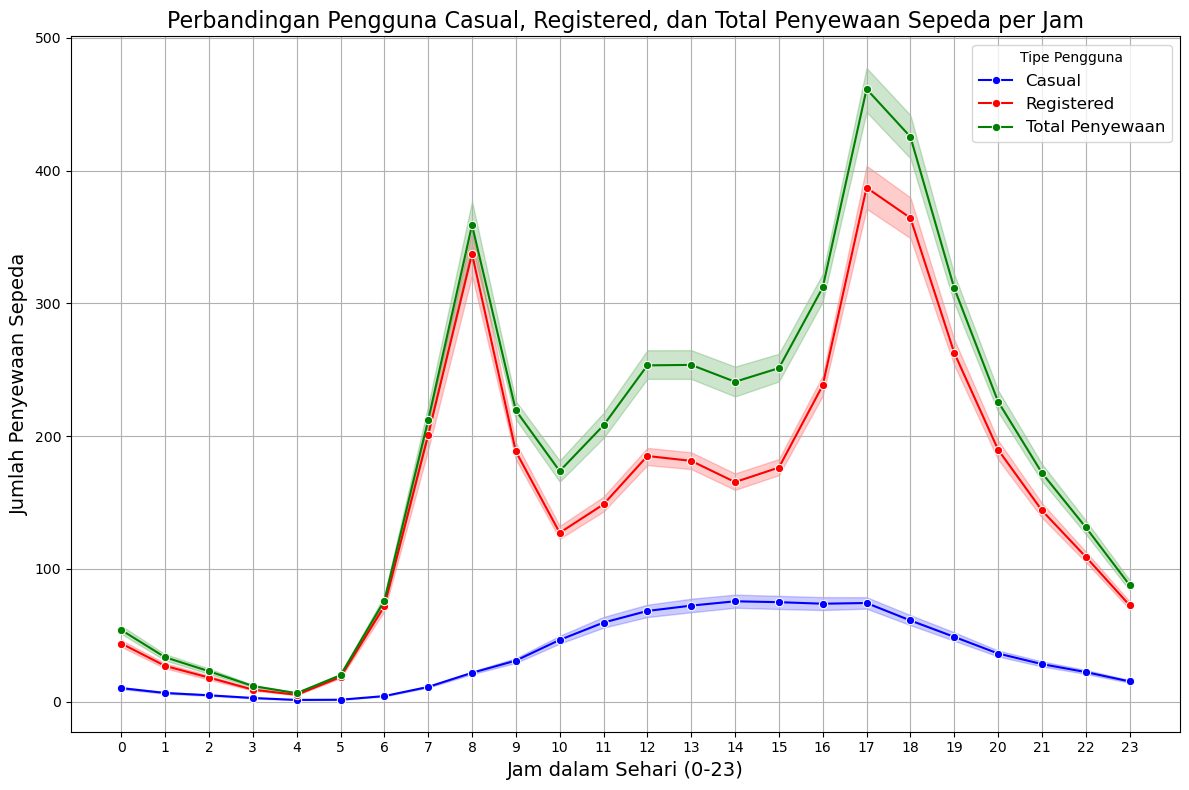

In [85]:
# membuat visualisasi data gabungan
plt.figure(figsize=(12, 8))
sns.lineplot(x='hr', y='casual', data=all_df, label='Casual', color='blue', marker='o')
sns.lineplot(x='hr', y='registered', data=all_df, label='Registered', color='red', marker='o')
sns.lineplot(x='hr', y='cnt', data=all_df, label='Total Penyewaan', color='green', marker='o')
plt.title('Perbandingan Pengguna Casual, Registered, dan Total Penyewaan Sepeda per Jam', fontsize=16)
plt.xlabel('Jam dalam Sehari (0-23)', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend(title='Tipe Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Pengguna registered lebih banyak jika dibandingkan pengguna casual dan juga lebih stabil. 
- Ada dua pola peningkatan penyewaan sepeda di pagi hari (sekitar jam 7–9) dan di sore hari (sekitar jam 17–19).

## Conclusion

- Conclution pertanyaan 1:
Pengguna registered lebih banyak dan stabil dibandingkan dengan pengguna casual yang cenderung fluktuatif terutama pada musim liburan atau akhir pekan.
- Conclution pertanyaan 2:
Peningkatan penyewaan terjadi dalam jam sibuk yaitu saat pagi hari (7-9) dan sore hari (17-19).

Dengan hasil ini, strategi dapat difokuskan untuk memaksimalkan penyewaan diluar jam sibuk seperti memberikan promo untuk pengguna casual diluar jam sibuk untuk meningkatkan penyewaan sepeda, meningkatkan fasilitas dan sebagainya.

In [86]:
all_df.to_csv("all_data.csv", index=False)